In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Reading the data

In [2]:
df=pd.read_csv('spam.csv',encoding="latin-1")

In [3]:
df.head()

,class,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [5]:
df.head()

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.describe()

,class,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


# Removing NULL and Duplicates

In [7]:
df['class'].value_counts()

ham     4825
spam     747
Name: class, dtype: int64

In [8]:
df.isnull().sum()
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df.duplicated().sum()

0

In [9]:
df.describe()

,class,message
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


# Changing the values of class to numbers
###### 0: ham   1: spam

In [10]:
df['class']=df['class'].apply(lambda x: 1 if x == 'spam' else 0)

In [11]:
df

,class,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


# Cleaning the Data

###### Run this cell to download the stopwords

In [12]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vipin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [13]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
print(stop_words)

{"hadn't", 'own', 'but', "you're", 'did', "won't", 'a', 'needn', 'here', 'why', 'during', 'on', 'other', 'if', 'how', "don't", "that'll", 'theirs', 'itself', 'm', 'up', 'hasn', 'am', 'isn', 'just', 'these', 'himself', 'where', 'their', 'my', 'herself', 'ourselves', 'didn', 'who', 'ours', 'which', 'for', 'when', 'yours', 'and', 'such', "haven't", 'nor', "hasn't", "mightn't", 'while', 'wouldn', 'over', 'his', 'than', 'll', 'aren', "aren't", 'don', 've', 'against', "you'd", 'he', 'out', 'into', 'by', 'being', 'are', "isn't", 'you', 'hers', 't', 'your', 'its', 'whom', "couldn't", 'mightn', 'weren', 'she', 'once', "doesn't", 'above', 'before', 'further', 'it', 'off', 'there', 'the', 'most', "shan't", 'all', 'now', 'does', 'our', 'more', "needn't", 'had', 'because', 'shouldn', 'ain', 'some', 'those', 'that', 'both', 'haven', 'doesn', 'hadn', 'under', 'only', 'at', 'having', 'what', 'we', 'has', 'or', 'below', 'about', 'same', 'be', 'any', 'wasn', 'yourselves', 'not', 'd', 'again', 'very', 't

In [14]:
import re
from tqdm import tqdm


processed_sentences=[]

for line in tqdm(df['message']):
    line = re.sub("\n", "", line)
    line = re.sub(r'[?|$|.|!|।|,|:|;|]','', line)
    line = re.sub("\S*\d\S*", "", line).strip()
    line=' '.join(e for e in line.split() if e not in stop_words)
    processed_sentences.append(line.strip())

100%|██████████████████████████████████████████████████████████████████████████| 5169/5169 [00:00<00:00, 111344.63it/s]


In [15]:
print(processed_sentences)

['Go jurong point crazy Available bugis n great world la e buffet Cine got amore wat', 'Ok lar Joking wif u oni', "Free entry wkly comp win FA Cup final tkts May Text FA receive entry question(std txt rate)T&C's apply", 'U dun say early hor U c already say', 'Nah I think goes usf lives around though', "FreeMsg Hey darling week's word back I'd like fun still Tb ok XxX std chgs send rcv", 'Even brother like speak They treat like aids patent', "As per request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' set callertune Callers Press copy friends Callertune", 'WINNER As valued network customer selected receivea prize reward To claim call Claim code Valid hours', 'Had mobile months U R entitled Update latest colour mobiles camera Free Call The Mobile Update Co FREE', "I'm gonna home soon want talk stuff anymore tonight k I've cried enough today", 'SIX chances win CASH From pounds txt> send Cost TsandCs apply Reply HL info', 'URGENT You week FREE membership Prize Jackpot Txt word CLAIM 

###### Total number of words

In [16]:
ans=0
for sentence in processed_sentences:
    ans += len(sentence.split())
print("Total words in processed_sentences is:", ans)

Total words in processed_sentences is: 49960


# Featurization

In [17]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

import pickle


The main difference between the TfidfVectorizer and TfidfTransformer classes is that the TfidfVectorizer combines two steps into one: tokenizing the text documents and computing the tf-idf values for each token. In contrast, the TfidfTransformer only performs the second step of computing the tf-idf values, assuming that the text has already been tokenized.

In [18]:
from collections import Counter
# create an empty list to hold the words
words = []

# split each sentence into a list of words
for sentence in processed_sentences:
    words.extend(sentence.split())

# create a counter for the words
word_counts = Counter(words)
# print the total number of unique words
print(f"There are {len(word_counts)} unique words in the sentences.")

There are 10698 unique words in the sentences.


### Count Vectorizer (Bag of Words)

In [19]:
count_vect = CountVectorizer(lowercase=True,ngram_range=(1,8), min_df=8,stop_words='english') #in scikit-learn
count_vect.fit(processed_sentences)
print("some feature names ", len(count_vect.get_feature_names_out()))
print('='*50)

final_counts = count_vect.transform(processed_sentences)
print("the type of count vectorizer ",type(final_counts))
print("the shape of out text BOW vectorizer ",final_counts.get_shape())
print("the number of unique words ", final_counts.get_shape()[1])

some feature names  1039
the type of count vectorizer  <class 'scipy.sparse._csr.csr_matrix'>
the shape of out text BOW vectorizer  (5169, 1039)
the number of unique words  1039


In [20]:
# Serialize the object and save it to a file
with open("Bag of words.pkl", "wb") as file:
    pickle.dump(count_vect, file)

# Restore the serialized object from the file
with open("Bag of words.pkl", "rb") as file:
    count_vect_model = pickle.load(file)


### TF-IDF

In [21]:
tf_idf_vect = TfidfVectorizer(lowercase=True,ngram_range=(1,8), min_df=8,stop_words='english')
tf_idf_vect.fit(processed_sentences)
print("some sample features(unique words in the corpus)",len(tf_idf_vect.get_feature_names()))
print('='*50)

final_tf_idf = tf_idf_vect.transform(processed_sentences)
print("the type of count vectorizer ",type(final_tf_idf))
print("the shape of out text TFIDF vectorizer ",final_tf_idf.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_tf_idf.get_shape()[1])

some sample features(unique words in the corpus) 1039
the type of count vectorizer  <class 'scipy.sparse._csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (5169, 1039)
the number of unique words including both unigrams and bigrams  1039


In [22]:
# Serialize the object and save it to a file
with open("Tfidf.pkl", "wb") as file:
    pickle.dump(tf_idf_vect, file)

# Restore the serialized object from the file
with open("Tfidf.pkl", "rb") as file:
    tf_idf_model = pickle.load(file)

### Conclusion:
So two models namely **count_vect_model** and **td_idf_model** are formed in this Featurization and we will use these models to convert our models

# Applying Naive Bayes and finding accuracy

In [23]:
import math
from sklearn.model_selection  import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection  import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from statistics import mean

In [24]:
X=processed_sentences
y=np.array(df['class'])

In [25]:
X_1, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)
X_tr, X_cv, y_tr, y_cv = train_test_split(X_1, y_train, test_size=0.15)

## BOW(Count Vectorizer)

In [26]:
final_X=count_vect_model.transform(X)

### Train Test Split

**Here we first divide the whole dataset into training(_train) and testing(_test) and then divide the training dataset into futher split with names (_tr) and (_cv) dataset so as find the optimal alpha and then make the model usinf that alpha**

In [27]:
final_Xtr=count_vect_model.transform(X_tr)         # tr
final_Xcv=count_vect_model.transform(X_cv)         # cv
final_Xtest=count_vect_model.transform(X_test)     # test
final_Xtrain=count_vect_model.transform(X_1)       # train

**Now we apply Naive bayes with Different Alpha parameters and find the optimal parameter and see the graph of AUC vs Hyperparameter for tr and cv**

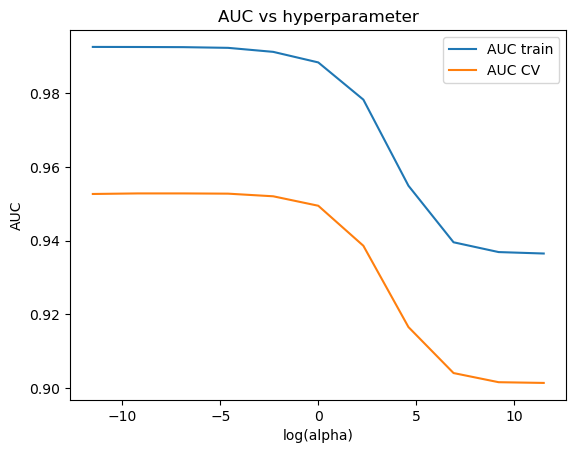

optimal alpha for which auc is maximum : 0.001


In [28]:
auc_train=[]
auc_cv=[]
alpha_values = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000]#alpha from 10^-5 to 10^5
    
for i in alpha_values:
    mnb = MultinomialNB(alpha = i)
    mnb.fit(final_Xtr,y_tr)
    pred=mnb.predict_proba(final_Xcv)[:,1]
    pred1=mnb.predict_proba(final_Xtr)[:,1]
    auc_train.append(roc_auc_score(y_tr,pred1))
    auc_cv.append(roc_auc_score(y_cv,pred))
    
optimal_alpha= alpha_values[auc_cv.index(max(auc_cv))]
alpha_values=[math.log(x) for x in alpha_values]
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(alpha_values, auc_train, label='AUC train')
ax.plot(alpha_values, auc_cv, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('log(alpha)')
plt.ylabel('AUC')
ax.legend()
plt.show()
print('\033[1moptimal alpha for which auc is maximum : {}\033[0m'.format(optimal_alpha))

**Now that we know the optimal value of alpha we use this optimal value to find the ROC curve between training and testing data**

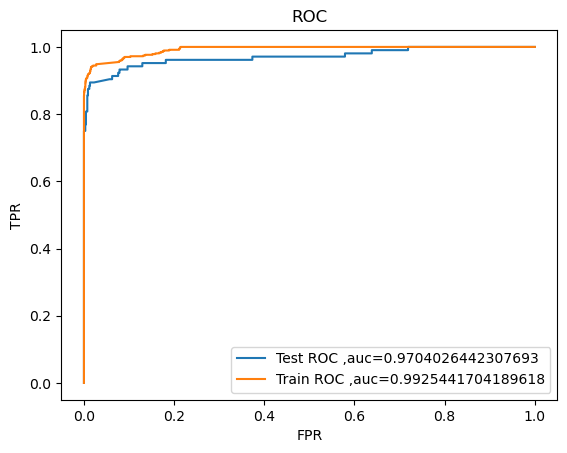

In [29]:
mnb=MultinomialNB(alpha = optimal_alpha)
mnb.fit(final_Xtr,y_tr)
predi=mnb.predict_proba(final_Xtest)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, predi)
pred=mnb.predict_proba(final_Xtr)[:,1]
fpr2,tpr2,thresholds2=metrics.roc_curve(y_tr,pred)
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(fpr1, tpr1, label='Test ROC ,auc='+str(roc_auc_score(y_test,predi)))
ax.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_tr,pred)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
ax.legend()
plt.show()

##### Training confusion matrix

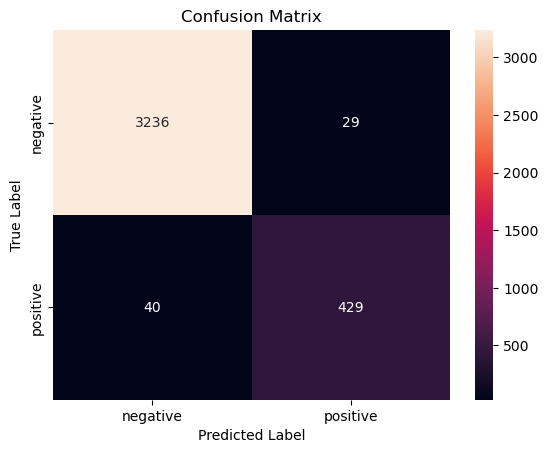

In [30]:
#confusion matrix using heatmap for train data
from sklearn.metrics import confusion_matrix
mnb=MultinomialNB(alpha= optimal_alpha)
mnb.fit(final_Xtr,y_tr)
predic=mnb.predict(final_Xtr)
import seaborn as sns
conf_mat = confusion_matrix(y_tr, predic)
class_label = ["negative", "positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#### Testing confusion matrix

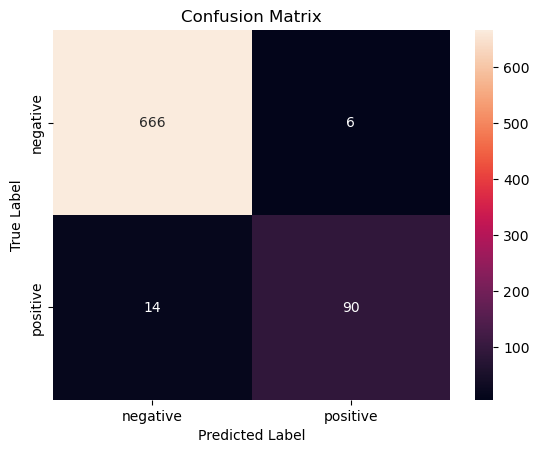

In [31]:
#Confusion matrix using heatmap for test data
from sklearn.metrics import confusion_matrix
mnb=MultinomialNB(alpha= optimal_alpha)
mnb.fit(final_Xtr,y_tr)
predic=mnb.predict(final_Xtest)
import seaborn as sns
conf_mat = confusion_matrix(y_test, predic)
class_label = ["negative", "positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#### Accuracy score using train test split

In [32]:
mnb=MultinomialNB(alpha= optimal_alpha)
mnb.fit(final_Xtr,y_tr)
predic=mnb.predict(final_Xtest)

acc_score = accuracy_score(y_test, predic)
print(acc_score)

0.9742268041237113


#### Accuracy score using cross validation

In [33]:
mnb=MultinomialNB(alpha= optimal_alpha)
scores = cross_val_score(mnb, final_X, y, cv=5)
scores.mean()

0.9740771185314039

###### Using Stratified K-fold because of imbalanced data sets

In [34]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []
lr=MultinomialNB(alpha= optimal_alpha)

for train_index, test_index in skf.split(final_X, y):
    x_train_fold, x_test_fold = final_X[train_index], final_X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    lr.fit(x_train_fold, y_train_fold)
    predic=lr.predict(x_test_fold)
    lst_accu_stratified.append(lr.score(x_test_fold, y_test_fold))

In [35]:
from statistics import mean, stdev

print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

List of possible accuracy: [0.97678916827853, 0.9787234042553191, 0.97678916827853, 0.9671179883945842, 0.9729206963249516, 0.9787234042553191, 0.9787234042553191, 0.9709864603481625, 0.9709864603481625, 0.9728682170542635]

Maximum Accuracy That can be obtained from this model is: 97.87234042553192 %

Minimum Accuracy: 96.71179883945842 %

Overall Accuracy: 97.44628371793141 %

Standard Deviation is: 0.004059544793399683


**Saving the Multinomial Naive bayes model with Count Vectorization (Bag of Words) as "BOW MNB.pkl"** 

In [36]:
mnb=MultinomialNB(alpha=optimal_alpha)
mnb.fit(final_X,y)

MultinomialNB(alpha=0.001)

In [37]:
# Serialize the object and save it to a file
with open("BOW MNB.pkl", "wb") as file:
    pickle.dump(mnb, file)

# Restore the serialized object from the file
with open("BOW MNB.pkl", "rb") as file:
    BOW_mnb_model = pickle.load(file)


# TF-IDF

In [38]:
final_X=tf_idf_model.transform(X)

In [39]:
X_train=tf_idf_model.transform(X_tr)
X_cv=tf_idf_model.transform(X_cv)
X_test=tf_idf_model.transform(X_test)

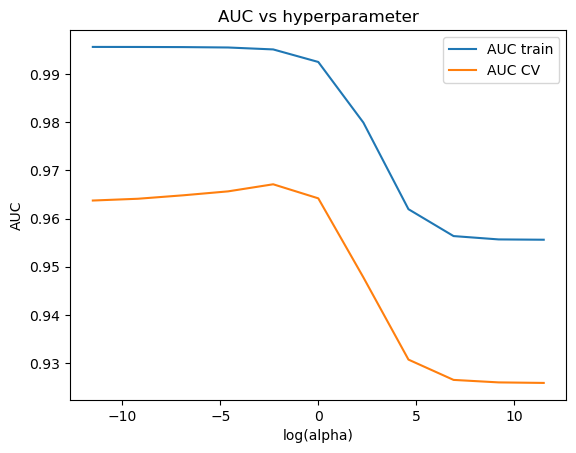

optimal alpha for which auc is maximum :  0.1


In [40]:
#Applying Multinomial Naive Bayes on TFIDF
# Please write all the code with proper documentation

auc_cv=[]
auc_train=[]
alpha_values = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000]
    
for i in alpha_values:
    mnb = MultinomialNB(alpha = i)
    mnb.fit(X_train,y_tr)
    pred=mnb.predict_proba(X_cv)[:,1]
    pred1=mnb.predict_proba(X_train)[:,1]
    auc_train.append(roc_auc_score(y_tr,pred1))
    auc_cv.append(roc_auc_score(y_cv,pred))
    
optimal_alpha= alpha_values[auc_cv.index(max(auc_cv))]
alpha_values=[math.log(x) for x in alpha_values]
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(alpha_values, auc_train, label='AUC train')
ax.plot(alpha_values, auc_cv, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('log(alpha)')
plt.ylabel('AUC')
ax.legend()
plt.show()
print('optimal alpha for which auc is maximum : ',optimal_alpha)

#### ROC curve for test data

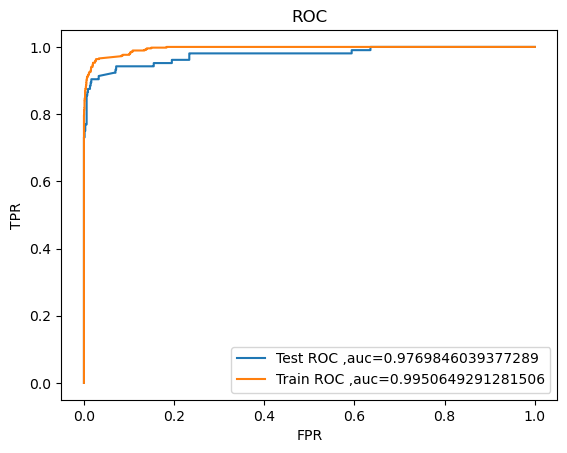

In [41]:
mnb=MultinomialNB(alpha = optimal_alpha)
mnb.fit(X_train,y_tr)
predi=mnb.predict_proba(X_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, predi)
pred=mnb.predict_proba(X_train)[:,1]
fpr2,tpr2,thresholds2=metrics.roc_curve(y_tr,pred)
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(fpr1, tpr1, label='Test ROC ,auc='+str(roc_auc_score(y_test,predi)))
ax.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_tr,pred)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
ax.legend()
plt.show()

#### Train confusion matrix

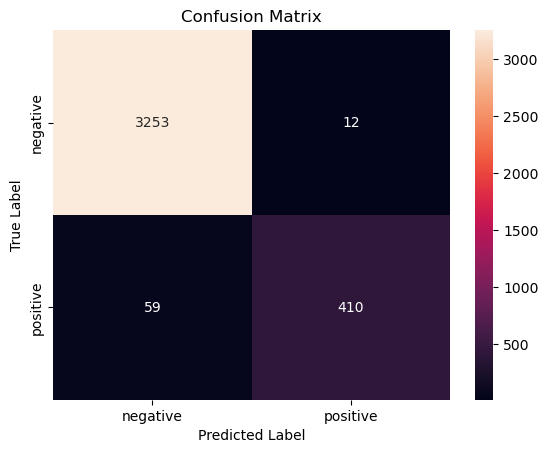

In [42]:
#confusion matrix using heatmap for train data
from sklearn.metrics import confusion_matrix
mnb=MultinomialNB(alpha=optimal_alpha)
mnb.fit(X_train,y_tr)
predic=mnb.predict(X_train)
import seaborn as sns
conf_mat = confusion_matrix(y_tr, predic)
class_label = ["negative", "positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#### Test confusion matrix

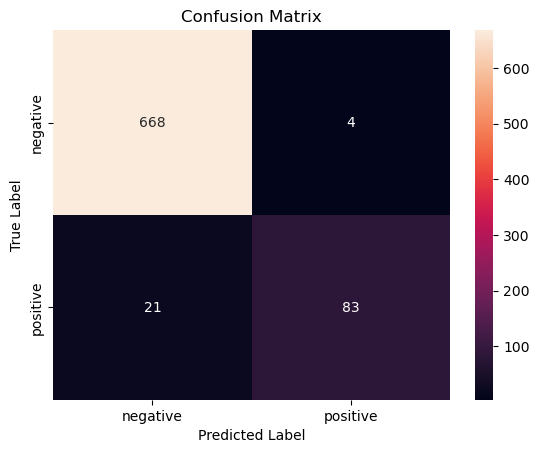

In [43]:
#Confusion matrix 
from sklearn.metrics import confusion_matrix
mnb=MultinomialNB(alpha=optimal_alpha)
mnb.fit(X_train,y_tr)
predic=mnb.predict(X_test)
import seaborn as sns
conf_mat = confusion_matrix(y_test, predic)
class_label = ["negative", "positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#### Accuracy score using train test split

In [44]:
mnb=MultinomialNB(alpha= optimal_alpha)
mnb.fit(final_Xtrain,y_train)
predic=mnb.predict(final_Xtest)

acc_score = accuracy_score(y_test, predic)
print(acc_score)

0.9768041237113402


**Saving the Multinomial Naive bayes model with TF-IDF Vectorization (Term Frequency–Inverse Document Frequency) as "TFIDF MNB.pkl"**

In [45]:
mnb=MultinomialNB(alpha=optimal_alpha)
mnb.fit(final_X,y)

MultinomialNB(alpha=0.1)

In [46]:
# Serialize the object and save it to a file
with open("TFIDF MNB.pkl", "wb") as file:
    pickle.dump(mnb, file)

# Restore the serialized object from the file
with open("TFIDF MNB.pkl", "rb") as file:
    TFIDF_mnb_model = pickle.load(file)


# Implementation of Tkinter library and making an application which will classify the text

In [47]:
from win32com.client import Dispatch

In [48]:
def speak(text):
	speak=Dispatch(("SAPI.SpVoice"))
	speak.Speak(text)

In [49]:
def result(msg):
    data = [msg]
    vect = count_vect_model.transform(data)
    my_prediction = BOW_mnb_model.predict(vect)
    if my_prediction[0]==1:
        speak("This is a Spam mail")
        print("This is a Spam mail")
    else:
        speak("This is not a Spam mail")
        print("This is not a Spam mail")

**Checking to see if the result function is working**

In [50]:
# msg=input()
# result(msg)

you have won
This is a Spam mail


In [51]:
import tkinter as tk

In [52]:
root=tk.Tk()
root.geometry("200x200")
l2=tk.Label(root, text="Email Spam Classification Application")
l2.pack()
l1=tk.Label(root, text="Enter Your Message:")
l1.pack()
text=tk.Entry(root)
text.pack()
def result():
    data = [text.get()]
    vect = count_vect_model.transform(data)
    my_prediction = BOW_mnb_model.predict(vect)
    print(data)
    if my_prediction[0]==1:
        speak("This is a Spam mail")
        print("This is a Spam mail")
    else:
        speak("This is not a Spam mail")
        print("This is not a Spam mail")

B=tk.Button(root, text="Click", command=result)
B.pack()

root.mainloop()